In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/customer_churn (1).csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data = data.drop("customerID", axis = 1)

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
np.str

<ipython-input-15-15a72efb409b>:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.str


str

In [ ]:
data[data['TotalCharges']==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace({' ': 0})

In [ ]:
data.TotalCharges = pd.to_numeric(data.TotalCharges)   # convert object to int or float

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
data[data.Churn == "Yes"].shape

(1869, 20)

In [ ]:
data[data.Churn == "No"].shape

(5174, 20)

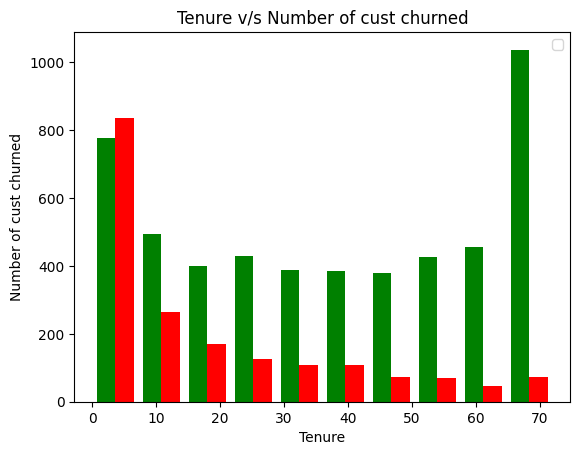

In [ ]:
tenure_churn_no = data[data.Churn == "No"].tenure
tenure_churn_yes = data[data.Churn == "Yes"].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of cust churned')
plt.title('Tenure v/s Number of cust churned')

plt.hist([tenure_churn_no, tenure_churn_yes], color = ['green', 'red'])
plt.legend()

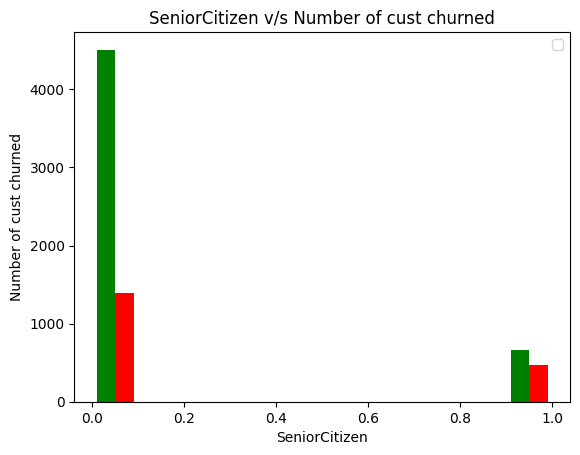

In [ ]:
SeniorCitizen_churn_no = data[data.Churn == "No"].SeniorCitizen
SeniorCitizen_churn_yes = data[data.Churn == "Yes"].SeniorCitizen

plt.xlabel('SeniorCitizen')
plt.ylabel('Number of cust churned')
plt.title('SeniorCitizen v/s Number of cust churned')

plt.hist([SeniorCitizen_churn_no, SeniorCitizen_churn_yes], color = ['green', 'red'])
plt.legend()

In [ ]:
x = tenure_churn_no.count()
y = tenure_churn_yes.count()
a = np.array([x,y])
mylabels = ['tenure_churn_no','tenure_churn_yes']

([<matplotlib.patches.Wedge at 0x7fb7e7304d30>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'tenure_churn_no'),
  Text(0.7393677515287918, -0.8144540060674139, 'tenure_churn_yes')])

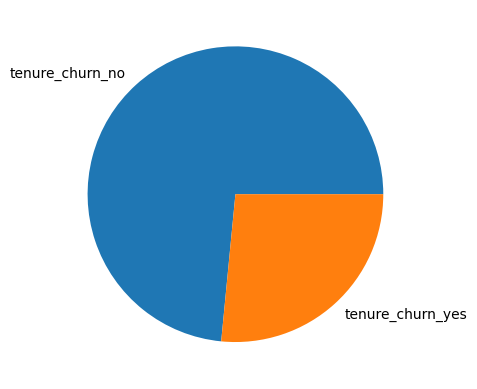

In [ ]:

plt.pie(a, labels = mylabels)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data['Churn'] = data['Churn'].replace({'No': 0 , 'Yes': 1})

In [ ]:
def co(d):
  for i in d:
    print(i,':',d[i].unique())

In [ ]:
co(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
# prompt: replace 'No phone service' and 'No internet service'  into 'No' in all coloumn


data['MultipleLines'] = data['MultipleLines'].replace({'No phone service': 'No'})
data['OnlineSecurity'] = data['OnlineSecurity'].replace({'No internet service': 'No'})
data['OnlineBackup'] = data['OnlineBackup'].replace({'No internet service': 'No'})
data['DeviceProtection'] = data['DeviceProtection'].replace({'No internet service': 'No'})
data['TechSupport'] = data['TechSupport'].replace({'No internet service': 'No'})
data['StreamingTV'] = data['StreamingTV'].replace({'No internet service': 'No'})
data['StreamingMovies'] = data['StreamingMovies'].replace({'No internet service': 'No'})


In [ ]:
co(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
# prompt: use getdummie function 'Internetservice', 'Contract' and 'PaymentMethod'

data = pd.get_dummies(data, columns = ['InternetService','Contract','PaymentMethod'])


In [ ]:
co(data)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
PaperlessBilling : ['Yes' 'No']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : 

In [ ]:


encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['Partner'] = encoder.fit_transform(data['Partner'])
data['Dependents'] = encoder.fit_transform(data['Dependents'])
data['PhoneService'] = encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = encoder.fit_transform(data['MultipleLines'])

data['OnlineSecurity'] = encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = encoder.fit_transform(data['DeviceProtection'])
data['StreamingTV'] = encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = encoder.fit_transform(data['StreamingMovies'])

data['PaperlessBilling'] = encoder.fit_transform(data['PaperlessBilling'])

data['TechSupport'] = encoder.fit_transform(data['TechSupport'])


In [ ]:
co(data)


gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]


In [ ]:


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])
data.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
co(data)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tec

In [ ]:


X = data.drop('Churn', axis = 1)
y = data['Churn']


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
y_train

5631    0
15      0
2831    1
4951    0
4473    0
       ..
5001    1
5996    0
3385    1
437     0
3537    0
Name: Churn, Length: 5282, dtype: int64

In [ ]:
model = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid"),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(64, activation = 'sigmoid'),
                            keras.layers.Dense(32, activation = "sigmoid"),
                            keras.layers.Dense(2, activation = "sigmoid")])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 200)


Epoch 1/200
166/166 [==============================] - 1s 1ms/step - loss: 0.5689 - accuracy: 0.7312
Epoch 2/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7804
Epoch 3/200
166/166 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.7855
Epoch 4/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7897
Epoch 5/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7908
Epoch 6/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7880
Epoch 7/200
166/166 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.7908
Epoch 8/200
166/166 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.7944
Epoch 9/200
166/166 [==============================] - 0s 2ms/step - loss: 0.4361 - accuracy: 0.7881
Epoch 10/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4342 - accura

In [ ]:
# prompt: apply ANN

model.evaluate(X_test, y_test)


56/56 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 0.8081


[0.4074966609477997, 0.8080636262893677]

In [ ]:
y_test_pre = model.predict(X_test)

56/56 [==============================] - 0s 1ms/step


In [ ]:
df = []
for i in y_test_pre:
     x =(np.argmax(i))
     df.append(x)

In [ ]:
y_pre = np.array(df)

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_pre)
type(cm)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1136,  183],
       [ 155,  287]], dtype=int32)>

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1319
           1       0.61      0.65      0.63       442

    accuracy                           0.81      1761
   macro avg       0.75      0.76      0.75      1761
weighted avg       0.81      0.81      0.81      1761



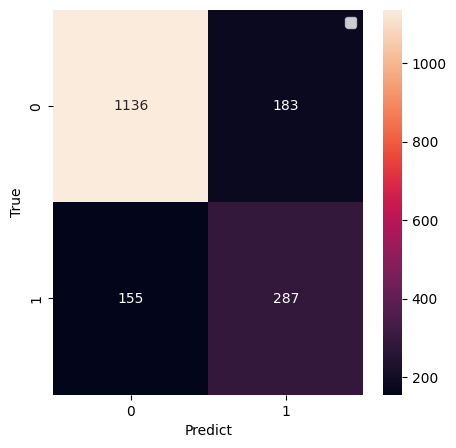

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel('Predict')
plt.ylabel('True')
plt.legend()

In [ ]:
model1 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(128, activation = "sigmoid"),
                            keras.layers.Dense(64, activation = 'sigmoid'),
                            keras.layers.Dense(32, activation = "sigmoid"),
                            keras.layers.Dense(2, activation = "sigmoid")])

model1.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model1.fit(X_train, y_train, epochs = 200)

Epoch 1/200
166/166 [==============================] - 1s 2ms/step - loss: 0.6340 - accuracy: 0.6995
Epoch 2/200
166/166 [==============================] - 0s 2ms/step - loss: 0.5781 - accuracy: 0.7298
Epoch 3/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4699 - accuracy: 0.7726
Epoch 4/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4476 - accuracy: 0.7844
Epoch 5/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4415 - accuracy: 0.7895
Epoch 6/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7917
Epoch 7/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7940
Epoch 8/200
166/166 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7904
Epoch 9/200
166/166 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.7931
Epoch 10/200
166/166 [==============================] - 0s 2ms/step - loss: 0.4367 - accura

In [ ]:
# prompt: add dropout layers in model1

model2 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation = "sigmoid")])

model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model2.fit(X_train, y_train, epochs = 100)


Epoch 1/100
166/166 [==============================] - 2s 3ms/step - loss: 0.6077 - accuracy: 0.7160
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5685 - accuracy: 0.7314
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7702
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7798
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.7828
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4560 - accuracy: 0.7770
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7885
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7825
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7891
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4445 - accura

In [ ]:
#batch normalization to model2

model2 = keras.Sequential([keras.layers.Flatten(),
    keras.layers.Dense(64, input_shape = (26,), activation = "sigmoid",kernel_initializer = keras.initializers.GlorotNormal()),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(128, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(64, activation = 'sigmoid'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(32, activation = "sigmoid"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
                            keras.layers.Dense(2, activation = "sigmoid")])

model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model2.fit(X_train, y_train, epochs = 100)


Epoch 1/100
166/166 [==============================] - 4s 3ms/step - loss: 0.6336 - accuracy: 0.6959
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7454
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.7512
Epoch 4/100
166/166 [==============================] - 0s 3ms/step - loss: 0.4713 - accuracy: 0.7675
Epoch 5/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4708 - accuracy: 0.7702
Epoch 6/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4609 - accuracy: 0.7704
Epoch 7/100
166/166 [==============================] - 1s 3ms/step - loss: 0.4573 - accuracy: 0.7738
Epoch 8/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4569 - accuracy: 0.7760
Epoch 9/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4537 - accuracy: 0.7806
Epoch 10/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4511 - accura

In [ ]:
#another way to write activation function

model3 = keras.Sequential([keras.layers.Flatten(),
        keras.layers.Dense(64, input_shape = (26,), activation = keras.activations.sigmoid()),
                            keras.layers.Dense(128, activation = keras.activations.sigmoid()),
                            keras.layers.Dense(128, activation = keras.activations.sigmoid()),
                            keras.layers.Dense(64, activation = keras.activations.sigmoid()),
                            keras.layers.Dense(32, activation = keras.activations.sigmoid()),
                            keras.layers.Dense(2, activation = keras.activations.sigmoid())])
model3.compile(optimizer = keras.optimizers.Adam(learning_rate=0.01), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

model3.fit(X_train, y_train, epochs = 100)


TypeError: Missing required positional argument